# Gradiente de una Imagen

## Operador Sobel

El operador Sobel es utilizado en procesamiento de imágenes, especialmente en algoritmos de detección de bordes. Técnicamente es un operador diferencial discreto que calcula una aproximación al gradiente de la función de intensidad de una imagen. Para cada punto de la imagen a procesar, el resultado del operador Sobel es tanto el vector gradiente correspondiente como la norma de éste vector.

El operador Sobel calcula el gradiente de la intensidad de una imagen en cada punto (píxel). Así, para cada punto, este operador da la magnitud del mayor cambio posible, la dirección de éste y el sentido desde oscuro a claro. El resultado muestra cómo de abruptamente o suavemente cambia una imagen en cada punto analizado y, en consecuencia, cuán probable es que éste represente un borde en la imagen y, también, la orientación a la que tiende ese borde. En la práctica, el cálculo de la magnitud -probabilidad de un borde- es más fiable y sencillo de interpretar que el cálculo de la dirección y sentido.

Matemáticamente, el gradiente de una función de dos variables (en este caso, la función de intensidad de la imagen) para cada punto es un vector bidimensional cuyos componentes están dados por las primeras derivadas de las direcciones verticales y horizontales. Para cada punto de la imagen, el vector gradiente apunta en dirección del incremento máximo posible de la intensidad, y la magnitud del vector gradiente corresponde a la cantidad de cambio de la intensidad en esa dirección.

Lo dicho en los párrafos anteriores implica que el resultado de aplicar el operador Sobel sobre una región con intensidad de imagen constante es un vector cero, y el resultado de aplicarlo en un punto sobre un borde es un vector que cruza el borde (perpendicular) cuyo sentido es de los puntos más oscuros a los más claros.



Matemáticamente, el operador utiliza dos kernels de 3×3 elementos para aplicar convolución a la imagen original para calcular aproximaciones a las derivadas, un kernel para los cambios horizontales y otro para las verticales. Si definimos ${\displaystyle \mathbf {A} } $ como la imagen original, el resultado, que son las dos imágenes ${\displaystyle \mathbf {G_{x}} } $ y ${\displaystyle \mathbf {G_{y}} } $ que representan para cada punto las aproximaciones horizontal y vertical de las derivadas de intensidades, es calculado como:1

$${\displaystyle \mathbf {G_{x}} ={\begin{bmatrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{bmatrix}}*\mathbf {A} \quad {\mbox{y}}\quad \mathbf {G_{y}} ={\begin{bmatrix}-1&-2&-1\\0&0&0\\+1&+2&+1\end{bmatrix}}*\mathbf {A} } $$
En cada punto de la imagen, los resultados de las aproximaciones de los gradientes horizontal y vertical pueden ser combinados para obtener la magnitud del gradiente, mediante:

$${\displaystyle \mathbf {G} ={\sqrt {\mathbf {G_{x}} ^{2}+\mathbf {G_{y}} ^{2}}}} $$
Con esta información, podemos calcular también la dirección del gradiente:

$${\displaystyle \mathbf {\Theta } =\operatorname {arctan} \left({\mathbf {G_{y}} \over \mathbf {G_{x}} }\right)}$$
donde, por ejemplo, ${\displaystyle \Theta }$ es 0 para bordes verticales con puntos más oscuros al lado izquierdo.

In [2]:
%pylab inline
import cv2
import numpy as np
from matplotlib import pyplot as plt



/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


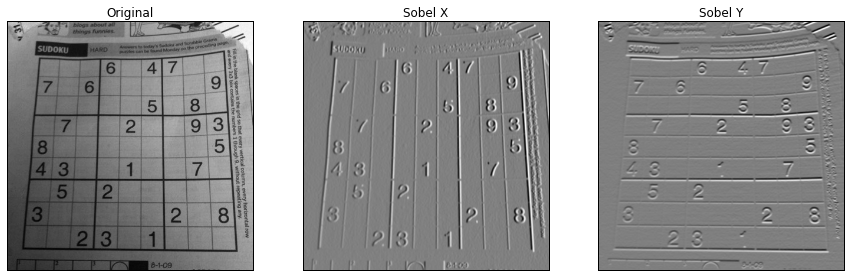

In [4]:
img = cv2.imread('sudoku.jpg',0)


sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) 
#imagel entrada, formato imagen salida, orden derivada x, orden derivada y, tamaño del kerne
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.figure(figsize=(15,15))
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Operador Lapalaciano

Se calcula el laplaciano de la imagen dada por la relación, 


$${\displaystyle \Delta f={\frac {\partial ^{2}f}{\partial x^{2}}}+{\frac {\partial ^{2}f}{\partial y^{2}}}} $$

Por diferencias finitas

$${\displaystyle \Delta f(x,y)\approx {\frac {f(x-h,y)+f(x+h,y)+f(x,y-h)+f(x,y+h)-4f(x,y)}{h^{2}}},\,} $$

El kernel sería

$$kernel = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$$

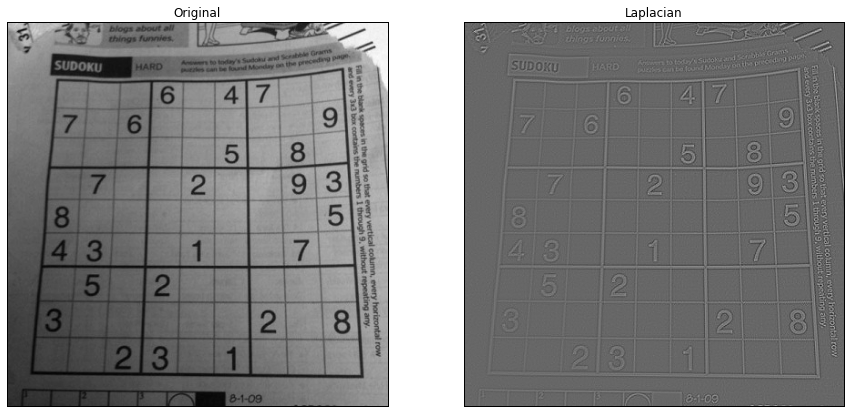

In [10]:
img = cv2.imread('sudoku.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])


plt.show()

## Detección Bordes

Fue desarrollado por John F. Canny en 1986. Se trata de un algoritmo de múltiples etapas.

#### 1. Reducción de ruido

La detección de bordes es susceptible al ruido en la imagen, por eso el primer paso es eliminar el ruido en la imagen con un filtro gaussiano de 5x5. 

#### 2. Encontrar Gradiente intensidad de la imagen

La imagen suavizada se filtra utilizando el operador Sobel, tanto en dirección horizontal y vertical para obtener primera derivada en la dirección horizontal ($G_x$) y la dirección vertical ($G_y$). A partir de estas dos imágenes, podemos encontrar la pendiente y dirección del borde para cada píxel de la siguiente manera:

$$Edge\_Gradient \; (G) = \sqrt {G_x ^ 2 + G_y ^ 2}$$

$$Ángulo \; (\Theta) = \tan ^ {- 1} \Bigg (\frac {G_y}{ G_x} \Bigg)$$

La dirección del gradiente es siempre perpendicular a los bordes. 

#### 3. Supresión del No -máximo

Después de conseguir la magnitud y dirección del gradiente, un análisis completo de la imagen se realiza para eliminar los píxeles no deseados que pueden no constituir el borde. Para ello, en cada pixel, pixel se comprueba si es un máximo local en su vecindad en la dirección del gradiente


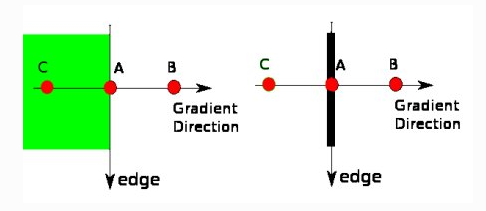

In [11]:
from IPython.display import Image
Image(filename='canny.png')



El punto A está en el borde (en la dirección vertical). La dirección del gradiente es perpendicular al borde. Los puntos B y C están en direcciones de gradiente. Así que el punto A está marcada con el punto B y C para ver si se forma un máximo local. Si es así, se considera para la próxima etapa, de lo contrario, se suprime (se pone cero).

En resumen, el resultado que se obtiene es una imagen binaria con "bordes delgados".

#### 4. Umbral de histéresis

Esta etapa se decide cuáles de todos los bordes son realmente bordes. Para esto, necesitamos dos valores de umbral para los gradientes, MINVAL y Maxval. Cualquier borde con gradiente de intensidad mayor a Maxval se esta seguro de ser bordes y el gradiente menor a MINVAL  se esta seguro que no es un borde. Los que se encuentran entre estos dos umbrales son bordes que pueden ser considerados dependiendo su conectividad. Si están conectados a elementos de la imagen que tengan un borde se consideran. De lo contrario, también se descartan. 



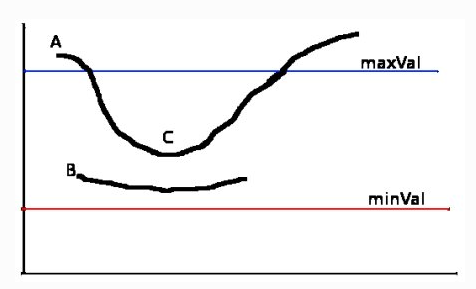

In [12]:
Image(filename='canny2.png')

#### 5. Umbral de histéresis
     
El borde A está por encima del Maxval, por lo que considera como un "borde seguro". Aunque borde C está por debajo del Maxval, es conectado con el borde A, por lo que también se considera como un borde válido  Pero el borde B, a pesar de que está por encima de MINVAL y está en misma región que el de borde C, no está conectado a ningún borde, por lo que se descarta. Por lo tanto, es muy importante que tenemos que seleccionar MINVAL y Maxval en consecuencia para obtener el resultado correcto.

Esta etapa también elimina ruidos pequeños píxeles en el supuesto de que los bordes son líneas largas.

Así que lo que finalmente obtenemos  son bordes fuertes en la imagen.

#### Detección de bordes  Canny en OpenCV

OpenCV pone todo lo anterior en una sola función, cv2.Canny (). Veremos cómo usarlo. El primer argumento es nuestra imagen de entrada. segundo y tercer argumento son nuestra MINVAL y MAXVAL respectivamente. En tercer argumento es aperture_size ( tamaño del kernel Sobel utilizado para  calcular el gradiente de la imagen. Por defecto es 3). Por último argumento es L2gradient que especifica la ecuación para encontrar magnitud del gradiente. 



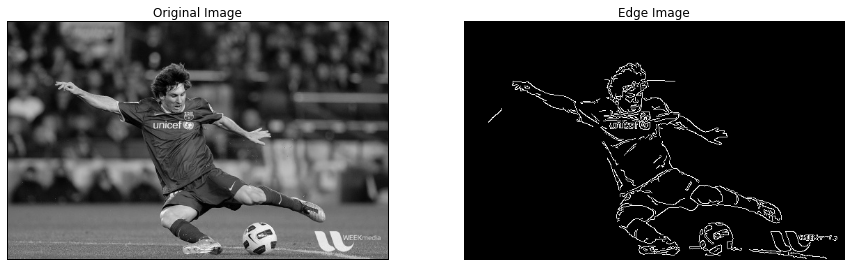

In [6]:
img = cv2.imread('messi5.jpg',0)
edges = cv2.Canny(img,150,300)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

## Imágenes Piramidales

Normalmente, se utilizó para trabajar con una imagen de tamaño constante. Sin embargo, en algunos casos, tenemos que trabajar con imágenes de diferente resolución de la misma imagen. Por ejemplo, durante la búsqueda de algo en una imagen, como la cara, no estamos seguros de qué tamaño estará presente en la imagen del objeto. En ese caso, tendremos que crear un conjunto de imágenes con diferentes resoluciones y  buscar los objetos en todas las imágenes. Este conjunto de imágenes con diferentes resoluciones son llamadas imagenes pirámidales.

Hay dos tipos de imagen piramidales. 1) Gaussianas y 2) Laplacianas

El nivel más alto (baja resolución) en una pirámide Gaussiana se forma mediante la eliminación de filas y columnas consecutivas de la imagen. A continuación, cada píxel de nivel superior está formado por la contribución de 5 píxeles en el nivel subyacente con pesos gaussianos. De esta manera, una imagen de $M \ times N$ se convierte en $M/2 \times N/2 $. Así una región se reduce a un cuarto de la superficie original.  El mismo patrón continúa a medida que avanzamos en la parte superior de la pirámide (es decir, la resolución se reduce). Del mismo modo, mientras que la expansión, se aumenta el área 4 veces en cada nivel. Podemos encontrar las pirámides gaussianas utilizando cv2.pyrDown () y cv2.pyrUp () funciones.

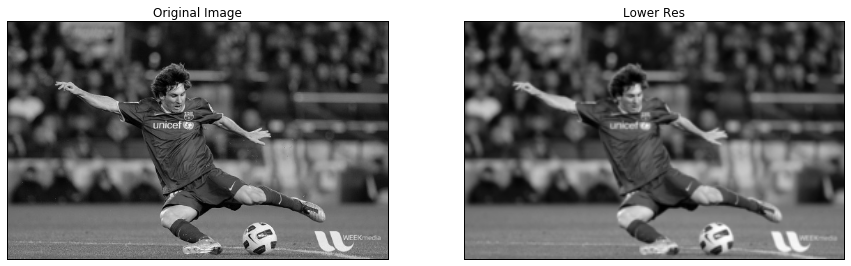

(342, 548) (171, 274)


In [19]:
lower_reso = cv2.pyrDown(img)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(lower_reso,cmap = 'gray')
plt.title('Lower Res'), plt.xticks([]), plt.yticks([])

plt.show()

print shape(img), shape(lower_reso)

## Contornos

Los contornos pueden explicarse simplemente como una curva que une todos los puntos continuos (a lo largo de la frontera), que tiene el mismo color o intensidad. Los contornos son una herramienta útil para el análisis de la forma y la detección de objetos y reconocimiento.

Para una mayor precisión, utilice imágenes binarias. Así que antes de encontrar contornos, aplique un thershold o la detección de bordes de Canny.

La función findContours  modifica la imagen de origen. Así que si la imagen de origen que desee, incluso después de encontrar los contornos, hay que almacenarlo en alguna otra variable.

En OpenCV, la búsqueda de contornos es como encontrar un objeto blanco de fondo negro. 



In [53]:
im = cv2.imread('dibujo.png')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, herar= cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

Para dibujar los contornos, se utiliza la función cv2.drawContours. También puede ser usado para dibujar cualquier forma siempre y cuando tenga sus puntos frontera. Su primer argumento es la imagen de origen, segundo argumento es el contorno que debe ser aprobada como una lista de Python, tercer argumento es el índice de contornos (útil cuando el dibujo del contorno individual. Para dibujar todos los contornos, pase -1) y el resto de argumentos son de color, grosor etcétera

In [56]:
img = cv2.drawContours(im, contours, -1, (0,255,0), 3)

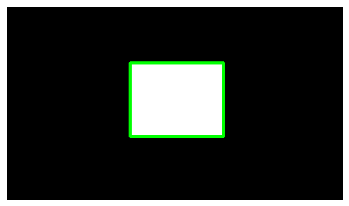

In [59]:
plt.imshow(im,cmap = 'gray')
plt.xticks([]), plt.yticks([])

plt.show()

El tercer argumento de la función cv2.findContours tiene diferentes opciones

Los contornos son los límites de una forma con la misma intensidad. Almacena las coordenadas (x, y) las coordenadas del límite de una forma. Pero almacena todas las coordenadas? 

Si pasa cv2.CHAIN_APPROX_NONE, se almacenan todos los puntos de la frontera. Pero en realidad necesitamos todos los puntos? Por ejemplo, se encuentre el contorno de una línea recta. ¿Necesita todos los puntos en la línea para representar a esa línea? No, necesitamos sólo dos puntos extremos de la línea. Esto es lo que hace cv2.CHAIN_APPROX_SIMPLE. Elimina todos los puntos redundantes y comprime el contorno, con el consiguiente se ahorra  memoria.



## Momentos

Los momentos de una imagen ayudan a calcular algunas características como centro de masa del objeto, área del objeto, etc. Confirmar la página de Wikipedia sobre Momentos imagen



In [60]:
img = cv2.imread('dibujo.png',0)
ret,thresh = cv2.threshold(img,127,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)
print M

{'mu02': 19886694.75, 'mu03': 0.0, 'm11': 700270535.25, 'nu02': 0.06543624161073826, 'm12': 109369525414.5, 'mu21': 0.0, 'mu20': 32252502.75, 'nu20': 0.10612535612535613, 'm30': 371216475893.25, 'nu21': 0.0, 'mu11': 0.0, 'mu12': 0.0, 'nu11': 0.0, 'nu12': 0.0, 'm02': 404323569.0, 'm03': 65948398337.25, 'm00': 17433.0, 'm01': 2588800.5, 'mu30': 0.0, 'nu30': 0.0, 'nu03': 0.0, 'm10': 4715626.5, 'm20': 1307829471.0, 'm21': 194212676443.5}


In [63]:
# El centro

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print cx,cy

270 148


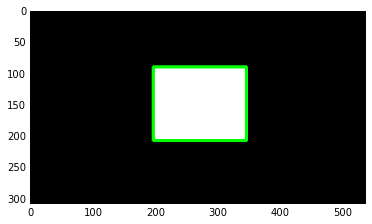

In [64]:
plt.imshow(im,cmap = 'gray')
plt.show()

In [65]:
# Area

area = cv2.contourArea(cnt)
print int(M['m00']),area



17433 17433.0


In [66]:
perimeter = cv2.arcLength(cnt,True)
print perimeter

532.0
